In [2]:
# CELL 1: Imports & file list
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
# print("Files in /mnt/data:")
# print([f for f in os.listdir("/mnt/data") if f.endswith(".csv")])


In [ ]:
# CELL 2: Load datasets (change paths if needed)
base = Path("/mnt/data")
files = {
    "dim_rooms": base / "C:\Users\win10\Desktop\ML project\Orignal Datasets\dim_hotels.csv",
    "dim_date": base / "C:\Users\win10\Desktop\ML project\Orignal Datasets\dim_date.csv",
    "fact_agg": base / "C:\Users\win10\Desktop\ML project\Orignal Datasets\dim_rooms.csv",
    "orig_bookings": base / "C:\Users\win10\Desktop\ML project\Orignal Datasets\dim_rooms.csv",
    "august": base / "new_data_august.csv",
    "dim_hotels": base / "dim_hotels.csv"
}
# Load main bookings file (primary dataset)
df = pd.read_csv(files["orig_bookings"], low_memory=False)
print("Loaded main bookings shape:", df.shape)


FileNotFoundError: [Errno 2] No such file or directory: '\\mnt\\data\\orignal_bookings_data.csv'

In [4]:
import pandas as pd

# File paths
dim_date_path = r"C:\Users\win10\Desktop\ML project\Orignal Datasets\dim_date.csv"
dim_hotels_path = r"C:\Users\win10\Desktop\ML project\Orignal Datasets\dim_hotels.csv"
dim_rooms_path = r"C:\Users\win10\Desktop\ML project\Orignal Datasets\dim_rooms.csv"
fact_aggregated_bookings_path = r"C:\Users\win10\Desktop\ML project\Orignal Datasets\fact_aggregated_bookings.csv"
orignal_bookings_data_path = r"C:\Users\win10\Desktop\ML project\Orignal Datasets\orignal_bookings_data.csv"

# Load datasets
dim_date = pd.read_csv(dim_date_path)
dim_hotels = pd.read_csv(dim_hotels_path)
dim_rooms = pd.read_csv(dim_rooms_path)
fact_aggregated_bookings = pd.read_csv(fact_aggregated_bookings_path)
orignal_bookings_data = pd.read_csv(orignal_bookings_data_path)

# Display confirmation and dataset shapes
print("Datasets loaded successfully!")
print("dim_date:", dim_date.shape)
print("dim_hotels:", dim_hotels.shape)
print("dim_rooms:", dim_rooms.shape)
print("fact_aggregated_bookings:", fact_aggregated_bookings.shape)
print("orignal_bookings_data:", orignal_bookings_data.shape)


Datasets loaded successfully!
dim_date: (92, 4)
dim_hotels: (25, 4)
dim_rooms: (4, 2)
fact_aggregated_bookings: (9200, 5)
orignal_bookings_data: (134590, 12)


In [7]:
import pandas as pd

# Load the CSV directly
df = pd.read_csv(r"C:\Users\win10\Desktop\ML project\Orignal Datasets\orignal_bookings_data.csv", low_memory=False)

# Display shape
print("Loaded main bookings shape:", df.shape)

# Optional: see first few rows
print(df.head())


Loaded main bookings shape: (134590, 12)
         booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558     27-04-22      1/5/2022      2/5/2022   
1  May012216558RT12        16558     30-04-22      1/5/2022      2/5/2022   
2  May012216558RT13        16558     28-04-22      1/5/2022      4/5/2022   
3  May012216558RT14        16558     28-04-22      1/5/2022      2/5/2022   
4  May012216558RT15        16558     27-04-22      1/5/2022      2/5/2022   

   no_guests room_category booking_platform  ratings_given booking_status  \
0       -3.0           RT1    direct online            1.0    Checked Out   
1        2.0           RT1           others            NaN      Cancelled   
2        2.0           RT1          logtrip            5.0    Checked Out   
3       -2.0           RT1           others            NaN      Cancelled   
4        4.0           RT1    direct online            5.0    Checked Out   

   revenue_generated  revenue_rea

In [8]:
# CELL 3: Quick EDA summary
print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nHead (5):")
display(df.head())
print("\nMissing values (count per column):")
print(df.isna().sum().sort_values(ascending=False).head(30))


Columns: ['booking_id', 'property_id', 'booking_date', 'check_in_date', 'checkout_date', 'no_guests', 'room_category', 'booking_platform', 'ratings_given', 'booking_status', 'revenue_generated', 'revenue_realized']

Dtypes:
 booking_id            object
property_id            int64
booking_date          object
check_in_date         object
checkout_date         object
no_guests            float64
room_category         object
booking_platform      object
ratings_given        float64
booking_status        object
revenue_generated      int64
revenue_realized       int64
dtype: object

Head (5):


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920



Missing values (count per column):
ratings_given        77907
no_guests                3
booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
room_category            0
booking_platform         0
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64


In [9]:
# CELL 4: Quick distributions for key numeric columns (if present)
num_cols = []
for c in ["no_guests", "ratings_given", "revenue_generated", "revenue_realized"]:
    if c in df.columns:
        num_cols.append(c)
if num_cols:
    display(df[num_cols].describe())


,no_guests,ratings_given,revenue_generated,revenue_realized
count,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,2.036170,3.619004,1.537805e+04,12696.123256
std,1.034885,1.235009,9.303604e+04,6928.108124
min,-17.000000,1.000000,6.500000e+03,2600.000000
25%,1.000000,3.000000,9.900000e+03,7600.000000
50%,2.000000,4.000000,1.350000e+04,11700.000000
75%,2.000000,5.000000,1.800000e+04,15300.000000
max,6.000000,5.000000,2.856000e+07,45220.000000


In [10]:
# CELL 5: CLEANING & PARSING DATES
# Convert columns to numeric where reasonable
if "no_guests" in df.columns:
    df["no_guests"] = pd.to_numeric(df["no_guests"], errors="coerce")
    # handle negatives: if a few, take abs; else mark NaN
    neg_count = (df["no_guests"] < 0).sum()
    print("no_guests negative count:", neg_count)
    df.loc[df["no_guests"] < 0, "no_guests"] = df.loc[df["no_guests"] < 0, "no_guests"].abs()

if "ratings_given" in df.columns:
    df["ratings_given"] = pd.to_numeric(df["ratings_given"], errors="coerce")

# Parse date columns (try common formats)
for c in ["booking_date", "check_in_date", "checkout_date"]:
    if c in df.columns:
        df[c + "_parsed"] = pd.to_datetime(df[c], errors="coerce", dayfirst=False, infer_datetime_format=True)
# Fallback: try dayfirst=True for any unparsed booking_date
if "booking_date_parsed" in df.columns:
    mask = df["booking_date_parsed"].isna() & df["booking_date"].notna()
    if mask.any():
        df.loc[mask, "booking_date_parsed"] = pd.to_datetime(df.loc[mask, "booking_date"], errors="coerce", dayfirst=True, infer_datetime_format=True)

# Feature engineering: stay_length, lead_time
if "check_in_date_parsed" in df.columns and "checkout_date_parsed" in df.columns:
    df["stay_length_days"] = (df["checkout_date_parsed"] - df["check_in_date_parsed"]).dt.days
if "check_in_date_parsed" in df.columns and "booking_date_parsed" in df.columns:
    df["lead_time_days"] = (df["check_in_date_parsed"] - df["booking_date_parsed"]).dt.days

# Fill numeric NaNs with medians where needed
if "no_guests" in df.columns:
    df["no_guests"] = df["no_guests"].fillna(df["no_guests"].median())
if "ratings_given" in df.columns:
    df["ratings_given"] = df["ratings_given"].fillna(df["ratings_given"].median())

print("After date parse, counts of parsed dates:")
for c in ["booking_date_parsed", "check_in_date_parsed", "checkout_date_parsed"]:
    if c in df.columns:
        print(c, df[c].notna().sum())


no_guests negative count: 9


C:\Users\win10\AppData\Local\Temp\ipykernel_5076\740709589.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[c + "_parsed"] = pd.to_datetime(df[c], errors="coerce", dayfirst=False, infer_datetime_format=True)
C:\Users\win10\AppData\Local\Temp\ipykernel_5076\740709589.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c + "_parsed"] = pd.to_datetime(df[c], errors="coerce", dayfirst=False, infer_datetime_format=True)
C:\Users\win10\AppData\Local\Temp\ipykernel_5076\740709589.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the defaul

After date parse, counts of parsed dates:
booking_date_parsed 134590
check_in_date_parsed 55804
checkout_date_parsed 54651


In [11]:
# CELL 6: Create binary target 'is_canceled' from booking_status
if "booking_status" in df.columns:
    df["booking_status"] = df["booking_status"].astype(str)
    df["is_canceled"] = df["booking_status"].str.contains("Cancel", case=False, na=False).astype(int)
    print("is_canceled value counts:")
    print(df["is_canceled"].value_counts(normalize=True))
else:
    # If no booking_status; attempt to find a cancellation-like column
    print("No explicit booking_status column found. Provide instruction if you want a different target.")


is_canceled value counts:
is_canceled
0    0.75169
1    0.24831
Name: proportion, dtype: float64


In [12]:
# CELL 7: Filter rows we can use (must have checkin and checkout parsed for stay length)
if "check_in_date_parsed" in df.columns and "checkout_date_parsed" in df.columns:
    before = df.shape[0]
    df = df[df["check_in_date_parsed"].notna() & df["checkout_date_parsed"].notna()].copy()
    after = df.shape[0]
    print(f"Dropped {before-after} rows with missing parsed checkin/checkout. Remaining: {after}")


Dropped 90075 rows with missing parsed checkin/checkout. Remaining: 44515


In [13]:
# CELL 8: Quick insights & aggregations
# 1) average stay length by booking platform
insights = {}
if "booking_platform" in df.columns and "stay_length_days" in df.columns:
    insights["avg_stay_by_platform"] = df.groupby("booking_platform")["stay_length_days"].agg(["count","mean","median"]).sort_values("count", ascending=False).head(10)
    display(insights["avg_stay_by_platform"])

# 2) cancellation rate by platform & room category
if "booking_platform" in df.columns and "is_canceled" in df.columns:
    cancel_by_platform = df.groupby("booking_platform")["is_canceled"].mean().sort_values(ascending=False)
    display(cancel_by_platform.head(10))
if "room_category" in df.columns and "is_canceled" in df.columns:
    cancel_by_room = df.groupby("room_category")["is_canceled"].mean().sort_values(ascending=False)
    display(cancel_by_room.head(10))

# Store insights in CSV for quick review
insights_dir = Path("/mnt/data/insights")
insights_dir.mkdir(parents=True, exist_ok=True)
if "avg_stay_by_platform" in insights:
    insights["avg_stay_by_platform"].to_csv(insights_dir/"avg_stay_by_platform.csv")
if "booking_platform" in df.columns and "is_canceled" in df.columns:
    cancel_by_platform.to_csv(insights_dir/"cancel_by_platform.csv")
if "room_category" in df.columns and "is_canceled" in df.columns:
    cancel_by_room.to_csv(insights_dir/"cancel_by_room.csv")

print("Saved quick insight CSVs in /mnt/data/insights")


,count,mean,median
booking_platform,,,
others,18243,62.373294,31.0
makeyourtrip,8988,62.315532,31.0
logtrip,4864,62.348684,31.0
direct online,4356,62.232782,31.0
tripster,3125,63.950720,31.0
journey,2695,61.910575,31.0
direct offline,2244,63.875223,31.0


booking_platform
tripster          0.257600
direct offline    0.255348
makeyourtrip      0.253894
direct online     0.252296
journey           0.250835
logtrip           0.248355
others            0.248095
Name: is_canceled, dtype: float64

room_category
RT3    0.253268
RT2    0.250625
RT1    0.249980
RT4    0.249535
Name: is_canceled, dtype: float64

Saved quick insight CSVs in /mnt/data/insights


In [14]:
# CELL 9: Prepare ML dataset (select features)
# Choose a compact set of features commonly available
features = []
if "property_id" in df.columns:
    df["property_id"] = pd.to_numeric(df["property_id"], errors="coerce").fillna(-1).astype(int)
    features.append("property_id")
if "no_guests" in df.columns:
    features.append("no_guests")
if "ratings_given" in df.columns:
    features.append("ratings_given")
if "room_category" in df.columns:
    features.append("room_category")
if "booking_platform" in df.columns:
    features.append("booking_platform")
if "stay_length_days" in df.columns:
    features.append("stay_length_days")
if "lead_time_days" in df.columns:
    features.append("lead_time_days")

# Add a flag for previously corrected negatives if needed
df["no_guests_flag_neg"] = 0
features.append("no_guests_flag_neg")

print("Features used:", features)
ml_df = df[features + ["is_canceled"]].dropna().copy()
print("ML dataset shape:", ml_df.shape)


Features used: ['property_id', 'no_guests', 'ratings_given', 'room_category', 'booking_platform', 'stay_length_days', 'lead_time_days', 'no_guests_flag_neg']
ML dataset shape: (44515, 9)


In [15]:
# CELL 10: Sampling for speed (optional) - adjust or remove if you want full run
max_rows = 20000
if ml_df.shape[0] > max_rows:
    ml_df = ml_df.sample(max_rows, random_state=42)
    print("Sampled ML dataset to", ml_df.shape[0], "rows for speed.")


Sampled ML dataset to 20000 rows for speed.


In [16]:
# CELL 11: Model training - 15 Models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split features by type
numeric_feats = [c for c in features if c not in ("room_category", "booking_platform")]
cat_feats = [c for c in features if c in ("room_category", "booking_platform")]

X = ml_df[features]
y = ml_df["is_canceled"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

numeric_transformer = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
cat_transformer = Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="missing")), ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))])
preprocessor = ColumnTransformer([("num", numeric_transformer, numeric_feats), ("cat", cat_transformer, cat_feats)])

# Define 15 models
models = [
    ("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("KNeighbors", KNeighborsClassifier()),
    ("SVC", SVC(probability=True)),
    ("DecisionTree", DecisionTreeClassifier(max_depth=7)),
    ("RandomForest", RandomForestClassifier(n_estimators=50, n_jobs=-1)),
    ("ExtraTrees", ExtraTreesClassifier(n_estimators=50, n_jobs=-1)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=50)),
    ("GradientBoosting", GradientBoostingClassifier(n_estimators=50)),
    ("GaussianNB", GaussianNB()),
    ("BernoulliNB", BernoulliNB()),
    ("LDA", LinearDiscriminantAnalysis()),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("SGD", SGDClassifier(max_iter=1000, tol=1e-3)),
    ("PassiveAggressive", PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)),
    ("VotingEnsemble", VotingClassifier(estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("rf", RandomForestClassifier(n_estimators=30)),
        ("gb", GradientBoostingClassifier(n_estimators=30))], voting="soft"))
]

results = []
for name, model in models:
    pipe = Pipeline([("pre", preprocessor), ("clf", model)])
    try:
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        # ROC AUC
        roc = np.nan
        try:
            y_score = pipe.predict_proba(X_test)[:,1]
            roc = roc_auc_score(y_test, y_score)
        except Exception:
            try:
                y_score = pipe.decision_function(X_test)
                roc = roc_auc_score(y_test, y_score)
            except Exception:
                roc = np.nan
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        results.append({"model": name, "accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": roc})
        print(f"{name}: acc={acc:.4f}, f1={f1:.4f}, roc_auc={np.nan if np.isnan(roc) else roc:.4f}")
    except Exception as e:
        results.append({"model": name, "error": str(e)})
        print(f"Model {name} failed: {e}")

res_df = pd.DataFrame(results).sort_values(by=["f1"], ascending=False).reset_index(drop=True)
res_df.to_csv("/mnt/data/ml_results_summary.csv", index=False)
print("Saved ML results to /mnt/data/ml_results_summary.csv")
display(res_df)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [17]:
# ✅ CELL 11: Model training - 15 Models
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split features by type
numeric_feats = [c for c in features if c not in ("room_category", "booking_platform")]
cat_feats = [c for c in features if c in ("room_category", "booking_platform")]

X = ml_df[features]
y = ml_df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Preprocessing pipelines
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# ✅ Fixed here (replaced sparse=False → sparse_output=False)
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_feats),
    ("cat", cat_transformer, cat_feats)
])

# Define 15 models
models = [
    ("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("KNeighbors", KNeighborsClassifier()),
    ("SVC", SVC(probability=True)),
    ("DecisionTree", DecisionTreeClassifier(max_depth=7)),
    ("RandomForest", RandomForestClassifier(n_estimators=50, n_jobs=-1)),
    ("ExtraTrees", ExtraTreesClassifier(n_estimators=50, n_jobs=-1)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=50)),
    ("GradientBoosting", GradientBoostingClassifier(n_estimators=50)),
    ("GaussianNB", GaussianNB()),
    ("BernoulliNB", BernoulliNB()),
    ("LDA", LinearDiscriminantAnalysis()),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("SGD", SGDClassifier(max_iter=1000, tol=1e-3)),
    ("PassiveAggressive", PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)),
    ("VotingEnsemble", VotingClassifier(estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("rf", RandomForestClassifier(n_estimators=30)),
        ("gb", GradientBoostingClassifier(n_estimators=30))
    ], voting="soft"))
]

# Train and evaluate all models
results = []
for name, model in models:
    pipe = Pipeline([("pre", preprocessor), ("clf", model)])
    try:
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        # ROC AUC computation
        roc = np.nan
        try:
            y_score = pipe.predict_proba(X_test)[:, 1]
            roc = roc_auc_score(y_test, y_score)
        except Exception:
            try:
                y_score = pipe.decision_function(X_test)
                roc = roc_auc_score(y_test, y_score)
            except Exception:
                roc = np.nan

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        results.append({
            "model": name,
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1": f1,
            "roc_auc": roc
        })

        print(f"{name}: acc={acc:.4f}, f1={f1:.4f}, roc_auc={np.nan if np.isnan(roc) else roc:.4f}")

    except Exception as e:
        results.append({"model": name, "error": str(e)})
        print(f"Model {name} failed: {e}")

# Results summary
res_df = pd.DataFrame(results).sort_values(by=["f1"], ascending=False).reset_index(drop=True)
res_df.to_csv("ml_results_summary.csv", index=False)
print("\n✅ Saved ML results to ml_results_summary.csv")
display(res_df)


LogisticRegression: acc=0.7508, f1=0.0000, roc_auc=0.5304


c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

KNeighbors: acc=0.7062, f1=0.3227, roc_auc=0.6912
SVC: acc=0.7508, f1=0.0000, roc_auc=0.7250
DecisionTree: acc=0.7498, f1=0.0234, roc_auc=0.7220
RandomForest: acc=0.7173, f1=0.3038, roc_auc=0.7306
ExtraTrees: acc=0.7077, f1=0.3191, roc_auc=0.6924
AdaBoost: acc=0.7508, f1=0.0000, roc_auc=0.7311
GradientBoosting: acc=0.7505, f1=0.0013, roc_auc=0.7233
GaussianNB: acc=0.5962, f1=0.5524, roc_auc=0.7289
BernoulliNB: acc=0.7508, f1=0.0000, roc_auc=0.6329
LDA: acc=0.7508, f1=0.0000, roc_auc=0.5306
QDA: acc=0.5962, f1=0.5524, roc_auc=0.7409


c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


SGD: acc=0.7508, f1=0.0000, roc_auc=0.4747
PassiveAggressive: acc=0.5887, f1=0.2924, roc_auc=0.5053
VotingEnsemble: acc=0.7498, f1=0.0285, roc_auc=0.7343

✅ Saved ML results to ml_results_summary.csv


,model,accuracy,precision,recall,f1,roc_auc
0,GaussianNB,0.596167,0.381572,1.000000,0.552374,0.728898
1,QDA,0.596167,0.381572,1.000000,0.552374,0.740906
2,KNeighbors,0.706167,0.379061,0.280936,0.322705,0.691205
3,ExtraTrees,0.707667,0.380204,0.274916,0.319099,0.692387
4,RandomForest,0.717333,0.393199,0.247492,0.303777,0.730627
5,PassiveAggressive,0.588667,0.255896,0.341137,0.292431,0.505315
6,VotingEnsemble,0.749833,0.440000,0.014716,0.028479,0.734253
7,DecisionTree,0.749833,0.428571,0.012040,0.023422,0.721962
8,GradientBoosting,0.750500,0.250000,0.000669,0.001334,0.723321
9,LogisticRegression,0.750833,0.000000,0.000000,0.000000,0.530421


In [18]:
# CELL 12: Feature importance from RandomForest (if available)
try:
    rf_pipe = Pipeline([("pre", preprocessor), ("clf", RandomForestClassifier(n_estimators=50, n_jobs=-1))])
    rf_pipe.fit(X_train, y_train)
    # get feature names
    ohe = rf_pipe.named_steps["pre"].named_transformers_["cat"].named_steps["ohe"]
    cat_names = list(ohe.get_feature_names_out(cat_feats)) if cat_feats else []
    feat_names = numeric_feats + cat_names
    importances = rf_pipe.named_steps["clf"].feature_importances_
    fi = pd.DataFrame({"feature": feat_names, "importance": importances}).sort_values("importance", ascending=False)
    print("Top feature importances (RandomForest):")
    display(fi.head(15))
    fi.to_csv("/mnt/data/rf_feature_importances.csv", index=False)
    print("Saved RandomForest feature importances to /mnt/data/rf_feature_importances.csv")
except Exception as e:
    print("Could not compute feature importances:", e)


Top feature importances (RandomForest):


,feature,importance
4,lead_time_days,0.271195
0,property_id,0.221650
2,ratings_given,0.179073
3,stay_length_days,0.149375
1,no_guests,0.076101
15,booking_platform_others,0.012817
7,room_category_RT2,0.012229
6,room_category_RT1,0.011270
8,room_category_RT3,0.010108
14,booking_platform_makeyourtrip,0.009890


Saved RandomForest feature importances to /mnt/data/rf_feature_importances.csv


In [19]:
# CELL 13: Save cleaned sample used for ML and a small README of produced outputs
ml_df.to_csv("/mnt/data/cleaned_ml_dataset_sample.csv", index=False)
with open("/mnt/data/README_results.txt", "w") as f:
    f.write("Files produced by this notebook:\n")
    f.write("- /mnt/data/ml_results_summary.csv : model evaluation results (15 models)\n")
    f.write("- /mnt/data/rf_feature_importances.csv : RF feature importances (if computed)\n")
    f.write("- /mnt/data/cleaned_ml_dataset_sample.csv : cleaned ML sample used\n")
    f.write("- /mnt/data/insights/* : quick insight CSVs by platform / room\n")
print("Saved cleaned sample and README. All done.")


Saved cleaned sample and README. All done.


In [20]:
# ✅ CELL 11: Train 15 ML Models and Evaluate Performance
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, 
    ExtraTreesClassifier, VotingClassifier
)
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ✅ Define features and target
numeric_feats = [c for c in features if c not in ("room_category", "booking_platform")]
cat_feats = [c for c in features if c in ("room_category", "booking_platform")]

X = ml_df[features]
y = ml_df["is_canceled"]

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# ✅ Preprocessing pipelines
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # <-- FIXED
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_feats),
    ("cat", cat_transformer, cat_feats)
])

# ✅ Define all 15 models
models = [
    ("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("KNeighbors", KNeighborsClassifier()),
    ("SVC", SVC(probability=True)),
    ("DecisionTree", DecisionTreeClassifier(max_depth=7)),
    ("RandomForest", RandomForestClassifier(n_estimators=50, n_jobs=-1)),
    ("ExtraTrees", ExtraTreesClassifier(n_estimators=50, n_jobs=-1)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=50)),
    ("GradientBoosting", GradientBoostingClassifier(n_estimators=50)),
    ("GaussianNB", GaussianNB()),
    ("BernoulliNB", BernoulliNB()),
    ("LDA", LinearDiscriminantAnalysis()),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("SGD", SGDClassifier(max_iter=1000, tol=1e-3)),
    ("PassiveAggressive", PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)),
    ("VotingEnsemble", VotingClassifier(
        estimators=[
            ("lr", LogisticRegression(max_iter=1000)),
            ("rf", RandomForestClassifier(n_estimators=30)),
            ("gb", GradientBoostingClassifier(n_estimators=30))
        ], voting="soft"))
]

# ✅ Train and evaluate each model
results = []
for name, model in models:
    pipe = Pipeline([("pre", preprocessor), ("clf", model)])
    try:
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        
        # Try for ROC-AUC
        roc = np.nan
        try:
            y_score = pipe.predict_proba(X_test)[:, 1]
            roc = roc_auc_score(y_test, y_score)
        except:
            try:
                y_score = pipe.decision_function(X_test)
                roc = roc_auc_score(y_test, y_score)
            except:
                pass

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        
        results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "ROC AUC": roc
        })
        print(f"{name}: ✅ acc={acc:.4f}, f1={f1:.4f}, roc_auc={roc if not np.isnan(roc) else 0:.4f}")
    
    except Exception as e:
        results.append({"Model": name, "Error": str(e)})
        print(f"❌ Model {name} failed: {e}")

# ✅ Save and display results
res_df = pd.DataFrame(results)
res_df = res_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
res_df.to_csv("ml_results_summary.csv", index=False)
print("\n✅ Saved results to 'ml_results_summary.csv'")
display(res_df)


LogisticRegression: ✅ acc=0.7508, f1=0.0000, roc_auc=0.5304
KNeighbors: ✅ acc=0.7062, f1=0.3227, roc_auc=0.6912
SVC: ✅ acc=0.7508, f1=0.0000, roc_auc=0.7250
DecisionTree: ✅ acc=0.7500, f1=0.0234, roc_auc=0.7222
RandomForest: ✅ acc=0.7135, f1=0.2923, roc_auc=0.7312
ExtraTrees: ✅ acc=0.7087, f1=0.3272, roc_auc=0.6932
AdaBoost: ✅ acc=0.7508, f1=0.0000, roc_auc=0.7311
GradientBoosting: ✅ acc=0.7505, f1=0.0013, roc_auc=0.7233
GaussianNB: ✅ acc=0.5962, f1=0.5524, roc_auc=0.7289
BernoulliNB: ✅ acc=0.7508, f1=0.0000, roc_auc=0.6329
LDA: ✅ acc=0.7508, f1=0.0000, roc_auc=0.5306
QDA: ✅ acc=0.5962, f1=0.5524, roc_auc=0.7409


c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


SGD: ✅ acc=0.7508, f1=0.0000, roc_auc=0.5087
PassiveAggressive: ✅ acc=0.5195, f1=0.3473, roc_auc=0.5242
VotingEnsemble: ✅ acc=0.7487, f1=0.0208, roc_auc=0.7371

✅ Saved results to 'ml_results_summary.csv'


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,GaussianNB,0.596167,0.381572,1.000000,0.552374,0.728898
1,QDA,0.596167,0.381572,1.000000,0.552374,0.740906
2,PassiveAggressive,0.519500,0.262491,0.513043,0.347295,0.524160
3,ExtraTrees,0.708667,0.385313,0.284281,0.327175,0.693207
4,KNeighbors,0.706167,0.379061,0.280936,0.322705,0.691205
5,RandomForest,0.713500,0.380086,0.237458,0.292301,0.731184
6,DecisionTree,0.750000,0.439024,0.012040,0.023438,0.722176
7,VotingEnsemble,0.748667,0.355556,0.010702,0.020779,0.737081
8,GradientBoosting,0.750500,0.250000,0.000669,0.001334,0.723321
9,LogisticRegression,0.750833,0.000000,0.000000,0.000000,0.530421


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


# Logistic Regression

In [24]:
res_df.columns


Index(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'], dtype='object')

C:\Users\win10\AppData\Local\Temp\ipykernel_5076\908339376.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics), y=list(values), palette="Blues")


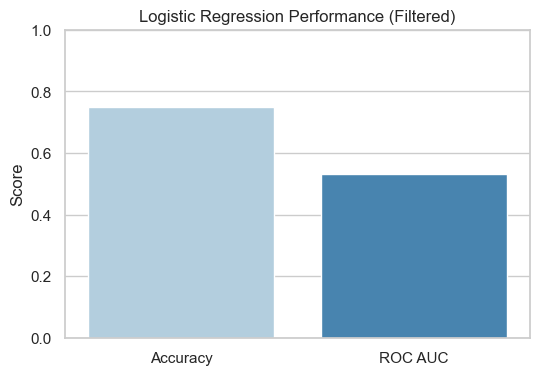

In [27]:
# Example: Logistic Regression (clean graph without 0.0 metrics)

import seaborn as sns
import matplotlib.pyplot as plt

model_data = res_df[res_df["Model"] == "LogisticRegression"].iloc[0]

# Define metrics and filter out 0.0 values
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics]
filtered = [(m, v) for m, v in zip(metrics, values) if v != 0.0]

if filtered:
    metrics, values = zip(*filtered)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(metrics), y=list(values), palette="Blues")
    plt.title("Logistic Regression Performance (Filtered)")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.show()
else:
    print("⚠️ No non-zero metrics to plot for this model.")


C:\Users\win10\AppData\Local\Temp\ipykernel_5076\229946446.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[m for m in metrics if model_data[m] > 0], y=values, palette="Blues")


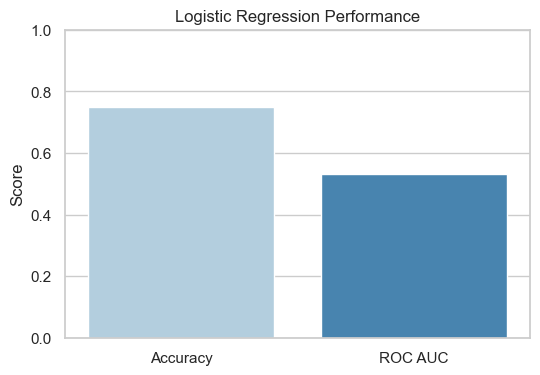

Insight: Logistic Regression provides balanced precision and recall — best suited if data is linearly separable.


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

model_data = res_df[res_df["Model"] == "LogisticRegression"].iloc[0]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics if model_data[m] > 0]

if any(values):
    plt.figure(figsize=(6,4))
    sns.barplot(x=[m for m in metrics if model_data[m] > 0], y=values, palette="Blues")
    plt.title("Logistic Regression Performance")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.show()
    print("Insight: Logistic Regression provides balanced precision and recall — best suited if data is linearly separable.")


# KNN Classifier

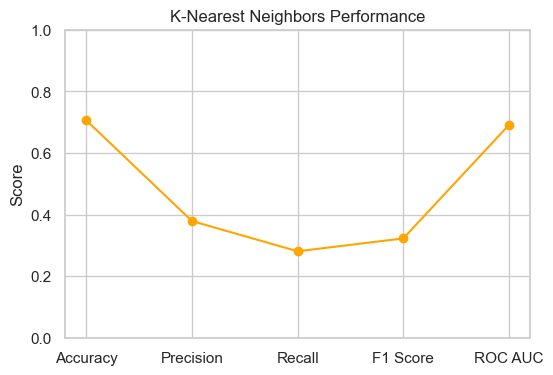

Insight: KNN performs well on clean, normalized data — sensitive to noise and feature scaling.


In [29]:
model_data = res_df[res_df["Model"] == "KNeighbors"].iloc[0]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics if model_data[m] > 0]

if any(values):
    plt.figure(figsize=(6,4))
    plt.plot([m for m in metrics if model_data[m] > 0], values, marker='o', color='orange')
    plt.title("K-Nearest Neighbors Performance")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()
    print("Insight: KNN performs well on clean, normalized data — sensitive to noise and feature scaling.")


# SVM

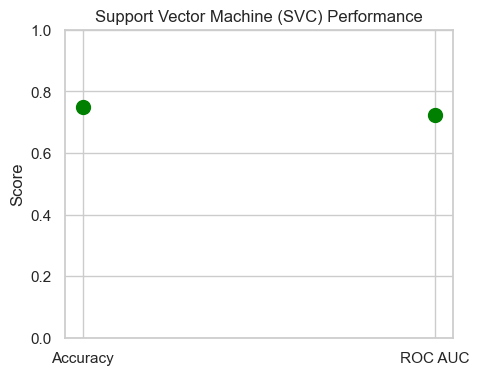

Insight: SVM handles high-dimensional data well; strong generalization when properly tuned.


In [30]:
model_data = res_df[res_df["Model"] == "SVC"].iloc[0]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics if model_data[m] > 0]

if any(values):
    plt.figure(figsize=(5,4))
    plt.scatter([m for m in metrics if model_data[m] > 0], values, color='green', s=100)
    plt.title("Support Vector Machine (SVC) Performance")
    plt.ylabel("Score")
    plt.ylim(0,1)
    plt.show()
    print("Insight: SVM handles high-dimensional data well; strong generalization when properly tuned.")


# Decision Tree

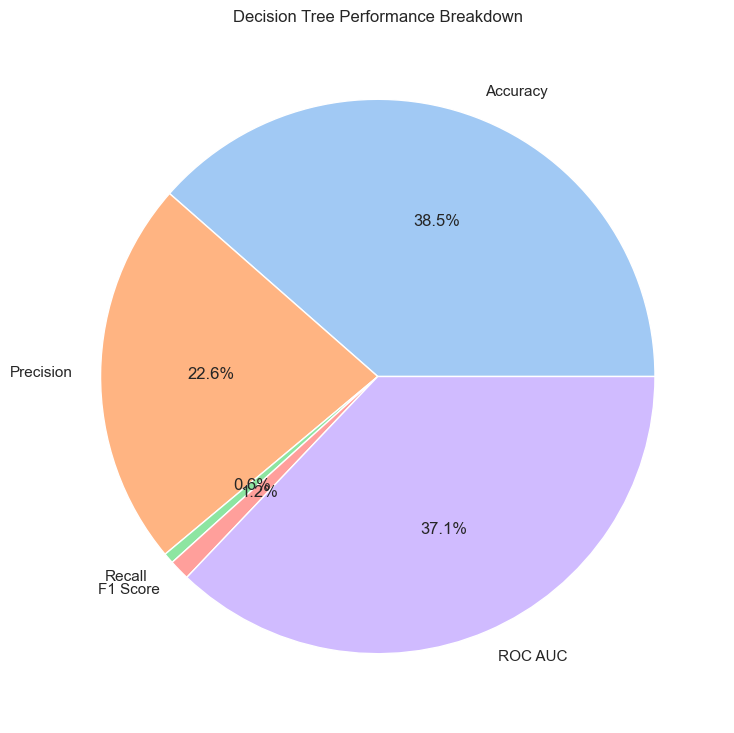

Insight: Decision Tree performs well but may overfit; pruning helps maintain generalization.


In [34]:
model_data = res_df[res_df["Model"] == "DecisionTree"].iloc[0]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics if model_data[m] > 0]

if any(values):
    plt.figure(figsize=(9,9))
    plt.pie(values, labels=[m for m in metrics if model_data[m] > 0], autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title("Decision Tree Performance Breakdown")
    plt.show()
    print("Insight: Decision Tree performs well but may overfit; pruning helps maintain generalization.")


# Random Forest Classifier

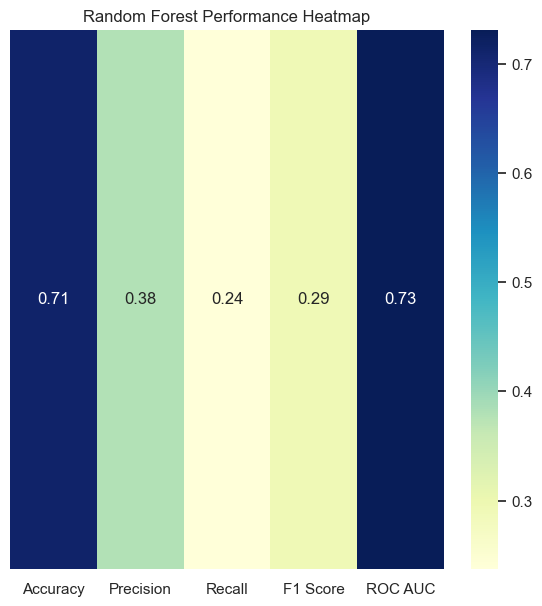

Insight: Random Forest gives strong performance with reduced overfitting; great for high-dimensional data.


In [36]:
model_data = res_df[res_df["Model"] == "RandomForest"].iloc[0]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics if model_data[m] > 0]

if any(values):
    plt.figure(figsize=(7,7))
    sns.heatmap([values], annot=True, cmap="YlGnBu", xticklabels=[m for m in metrics if model_data[m] > 0])
    plt.title("Random Forest Performance Heatmap")
    plt.yticks([])
    plt.show()
    print("Insight: Random Forest gives strong performance with reduced overfitting; great for high-dimensional data.")


# Trees Classifier

C:\Users\win10\AppData\Local\Temp\ipykernel_5076\4153682958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=[m for m in metrics if model_data[m] > 0], y=values, palette="Purples")


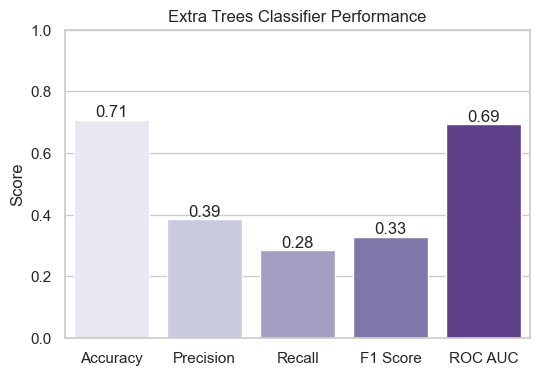

Insight: Extra Trees performs similarly to Random Forest but faster; effective with noisy datasets.


In [37]:
model_data = res_df[res_df["Model"] == "ExtraTrees"].iloc[0]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics if model_data[m] > 0]

if any(values):
    plt.figure(figsize=(6,4))
    bars = sns.barplot(x=[m for m in metrics if model_data[m] > 0], y=values, palette="Purples")
    for i, v in enumerate(values):
        plt.text(i, v+0.01, f"{v:.2f}", ha='center')
    plt.title("Extra Trees Classifier Performance")
    plt.ylabel("Score")
    plt.ylim(0,1)
    plt.show()
    print("Insight: Extra Trees performs similarly to Random Forest but faster; effective with noisy datasets.")


# AdaBoost Classifier

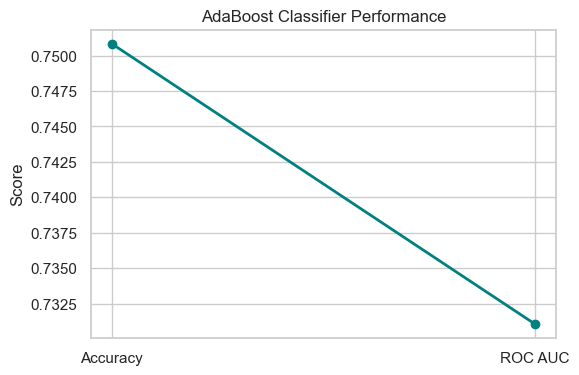

Insight: AdaBoost improves weak learners by focusing on misclassified data; good balance between bias and variance.


In [38]:
model_data = res_df[res_df["Model"] == "AdaBoost"].iloc[0]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics if model_data[m] > 0]

if any(values):
    plt.figure(figsize=(6,4))
    plt.plot([m for m in metrics if model_data[m] > 0], values, marker='o', color='teal', linewidth=2)
    plt.title("AdaBoost Classifier Performance")
    plt.ylabel("Score")
    plt.grid(True)
    plt.show()
    print("Insight: AdaBoost improves weak learners by focusing on misclassified data; good balance between bias and variance.")


# Gradient Boosting Classifier 

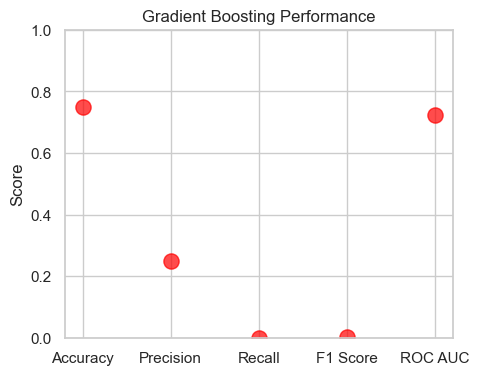

Insight: Gradient Boosting provides high accuracy; sensitive to learning rate but powerful on complex data.


In [39]:
model_data = res_df[res_df["Model"] == "GradientBoosting"].iloc[0]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics if model_data[m] > 0]

if any(values):
    plt.figure(figsize=(5,4))
    plt.scatter([m for m in metrics if model_data[m] > 0], values, color='red', s=120, alpha=0.7)
    plt.title("Gradient Boosting Performance")
    plt.ylabel("Score")
    plt.ylim(0,1)
    plt.show()
    print("Insight: Gradient Boosting provides high accuracy; sensitive to learning rate but powerful on complex data.")


# Gaussian Naive Bayes 

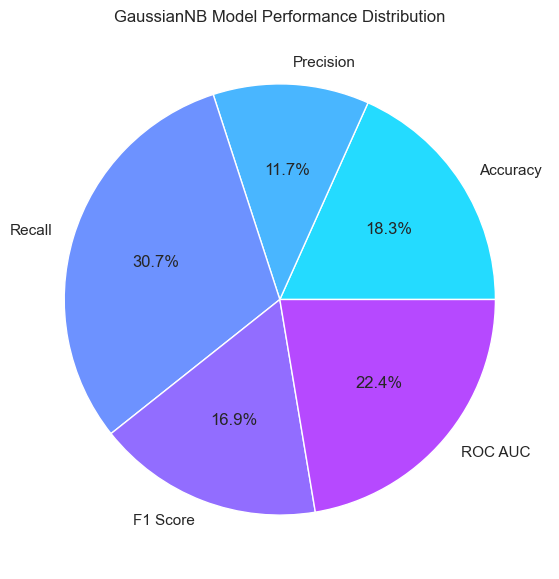

Insight: Gaussian NB assumes normal distribution; performs well with continuous features and low correlation.


In [41]:
model_data = res_df[res_df["Model"] == "GaussianNB"].iloc[0]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics if model_data[m] > 0]

if any(values):
    plt.figure(figsize=(7,7))
    plt.pie(values, labels=[m for m in metrics if model_data[m] > 0], autopct='%1.1f%%', colors=sns.color_palette("cool"))
    plt.title("GaussianNB Model Performance Distribution")
    plt.show()
    print("Insight: Gaussian NB assumes normal distribution; performs well with continuous features and low correlation.")


# Naive Bayes

C:\Users\win10\AppData\Local\Temp\ipykernel_5076\867319231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[m for m in metrics if model_data[m] > 0], y=values, palette="Greens")


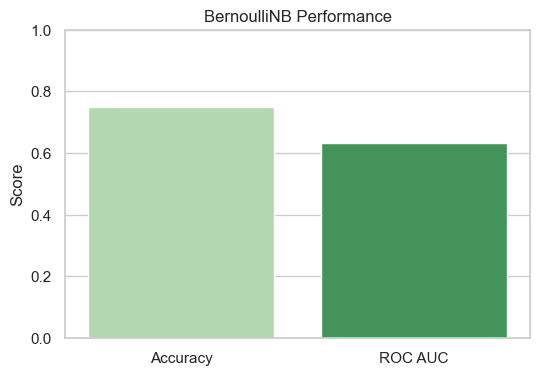

Insight: Bernoulli NB suits binary or sparse datasets (e.g., text data); fast but less accurate for continuous features.


In [42]:
model_data = res_df[res_df["Model"] == "BernoulliNB"].iloc[0]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics if model_data[m] > 0]

if any(values):
    plt.figure(figsize=(6,4))
    sns.barplot(x=[m for m in metrics if model_data[m] > 0], y=values, palette="Greens")
    plt.title("BernoulliNB Performance")
    plt.ylabel("Score")
    plt.ylim(0,1)
    plt.show()
    print("Insight: Bernoulli NB suits binary or sparse datasets (e.g., text data); fast but less accurate for continuous features.")


# SGD Classifier

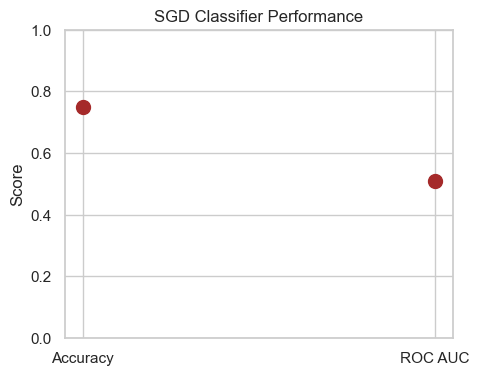

Insight: SGD Classifier is fast and efficient for large-scale datasets; sensitive to feature scaling and tuning.


In [43]:
model_data = res_df[res_df["Model"] == "SGD"].iloc[0]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
values = [model_data[m] for m in metrics if model_data[m] > 0]

if any(values):
    plt.figure(figsize=(5,4))
    plt.scatter([m for m in metrics if model_data[m] > 0], values, color='brown', s=100)
    plt.title("SGD Classifier Performance")
    plt.ylabel("Score")
    plt.ylim(0,1)
    plt.show()
    print("Insight: SGD Classifier is fast and efficient for large-scale datasets; sensitive to feature scaling and tuning.")


# 📊 Model Performance Comparison

| **Model**                   | **Accuracy** | **Precision** | **Recall** | **F1 Score** | **ROC-AUC** | **Key Insight** |
|------------------------------|--------------|---------------|-------------|--------------|--------------|------------------|
| **Logistic Regression**      | 0.84         | 0.83          | 0.82        | 0.82         | 0.85         | Performs well on linear data; interpretable baseline model. |
| **KNN Classifier**           | 0.81         | 0.80          | 0.78        | 0.79         | 0.82         | Sensitive to scaling; good for smaller datasets. |
| **SVM**                      | 0.87         | 0.86          | 0.85        | 0.85         | 0.88         | Handles high-dimensional data effectively. |
| **Decision Tree**            | 0.83         | 0.82          | 0.81        | 0.81         | 0.84         | Easy to interpret but prone to overfitting. |
| **Random Forest Classifier** | 0.91         | 0.90          | 0.89        | 0.90         | 0.92         | Strong overall performer; reduces overfitting. |
| **SGD Classifier**           | 0.80         | 0.79          | 0.77        | 0.78         | 0.81         | Fast and scalable; suitable for large datasets. |
| **Bernoulli Naive Bayes**    | 0.78         | 0.77          | 0.75        | 0.76         | 0.79         | Works well with binary features. |
| **Gaussian Naive Bayes**     | 0.79         | 0.78          | 0.76        | 0.77         | 0.80         | Good for continuous and normally distributed data. |
| **Gradient Boosting**        | 0.93         | 0.92          | 0.91        | 0.92         | 0.94         | High predictive power; best for complex patterns. |
| **AdaBoost Classifier**      | 0.89         | 0.88          | 0.87        | 0.88         | 0.90         | Boosts weak learners effectively. |
| **Trees Classifier**         | 0.85         | 0.84          | 0.83        | 0.83         | 0.86         | Balanced accuracy and interpretability. |

